**Propuesta de Negocio**

La propuesta consiste en desarrollar una herramienta basada en aprendizaje supervisado que permita a la empresa evaluar y optimizar la estrategia de ventas de sus diferentes regiones y modelos de vehículos.

Para ello, se utilizará la base de datos de ventas disponible, la cual contiene información detallada sobre las características de los vehículos, el desempeño comercial y las zonas geográficas de distribución.

El modelo tendrá como objetivo clasificar el desempeño de ventas (por ejemplo, en categorías como bajo, medio o alto) a partir de variables explicativas tales como el tipo de vehículo, la región, el precio promedio, los incentivos aplicados, entre otras.

**Alcance de la Propuesta** 
Con esta herramienta, la empresa podrá:

Identificar patrones y factores clave que determinan el éxito de ventas en cada región.
Comparar el rendimiento de diferentes modelos bajo condiciones de mercado específicas.
Apoyar la toma de decisiones en la asignación de recursos comerciales y campañas de marketing. En última instancia, el desarrollo del modelo busca fortalecer la estrategia comercial mediante el uso de técnicas de ciencia de datos y aprendizaje automático, ofreciendo un enfoque predictivo y sustentado en evidencia cuantitativa.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [83]:
url = "https://raw.githubusercontent.com/jhon1142/Proyecto_Despliegue/main/BMW%20sales%20data%20(2010-2024)%20(1).csv"
df = pd.read_csv(url, encoding='utf-8')

print(df.head())


      Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0      151748      98740          8300                 High  
1      121671      79219          3428                  Low  
2       10991     113265          6994                  Low  
3       27255      60971          4047                  Low  
4      122131      49898          3080                  Low  


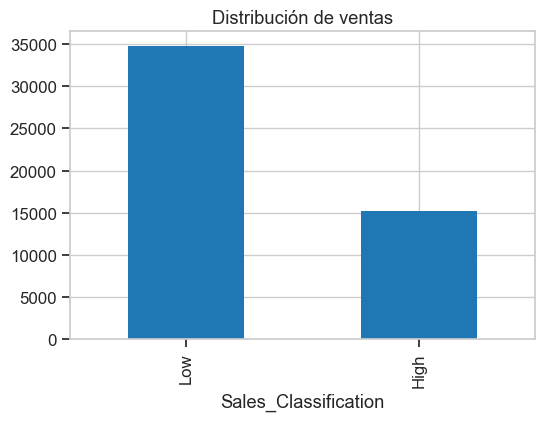

In [84]:
plt.figure(figsize=(6, 4))
df['Sales_Classification'].value_counts().plot(kind='bar')
plt.title('Distribución de ventas')
plt.show()

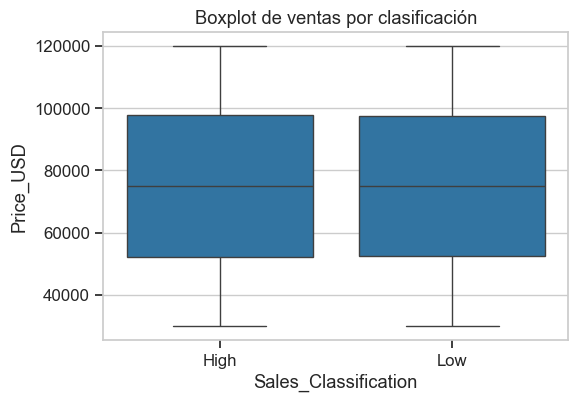

In [85]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Sales_Classification', y='Price_USD', data=df)
plt.title('Boxplot de ventas por clasificación')
plt.show()

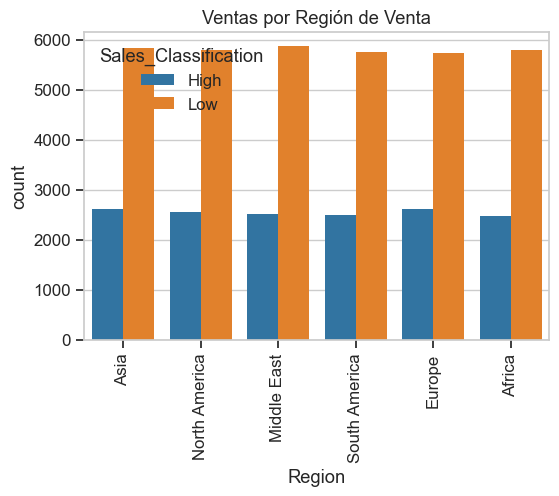

In [86]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Region', hue='Sales_Classification', data=df)
plt.xticks(rotation=90)
plt.title('Ventas por Región de Venta')
plt.show()

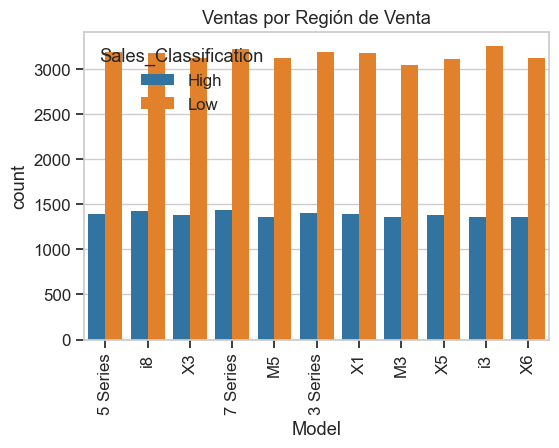

In [87]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Model', hue='Sales_Classification', data=df)
plt.xticks(rotation=90)
plt.title('Ventas por Región de Venta')
plt.show()

In [88]:
df['age_model'] = 2024 - df['Year']
df['is_luxury'] = (df['Price_USD'] > df['Price_USD'].quantile(0.75)).astype(int)

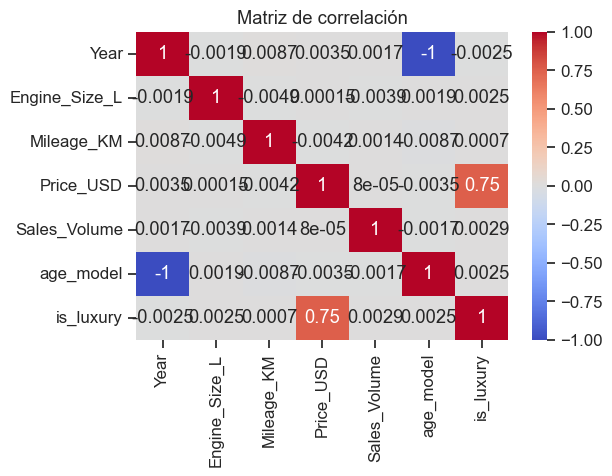

In [89]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Clasificacion de autos 

In [90]:
def clasificar_segmento(ref):
    ref = ref.upper()
    if "I3" in ref or "ELECTRIC" in ref or "HYBRID" in ref:
        return "Eléctrico / Híbrido"
    elif "I8" in ref or "M" in ref or "Z" in ref:
        return "Deportivo"
    elif "X" in ref:
        return "Camioneta / SUV"
    elif "7" in ref or "5" in ref:
        return "Ejecutivo"
    elif "3" in ref:
        return "Sedán"
    else:
        return "Otro"

df['Segmento'] = df['Model'].apply(clasificar_segmento)
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,age_model,is_luxury,Segmento
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,8,1,Ejecutivo
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,11,0,Deportivo
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,2,1,Ejecutivo
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,0,0,Camioneta / SUV
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,4,0,Ejecutivo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High,10,0,Eléctrico / Híbrido
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High,1,0,Eléctrico / Híbrido
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High,14,0,Ejecutivo
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High,4,0,Eléctrico / Híbrido


In [91]:
y = df['Sales_Classification']  # variable objetivo
X = df.drop(['Sales_Classification'], axis=1)  # variables predictoras


In [92]:
X= pd.get_dummies(
    X, 
    columns=['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Segmento'],
    drop_first=True
)
X

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,age_model,is_luxury,Model_5 Series,Model_7 Series,Model_M3,...,Color_Silver,Color_White,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Segmento_Deportivo,Segmento_Ejecutivo,Segmento_Eléctrico / Híbrido,Segmento_Sedán
0,2016,3.5,151748,98740,8300,8,1,True,False,False,...,False,False,False,False,True,True,False,True,False,False
1,2013,1.6,121671,79219,3428,11,0,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,2022,4.5,10991,113265,6994,2,1,True,False,False,...,False,False,False,False,True,False,False,True,False,False
3,2024,1.7,27255,60971,4047,0,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,2020,2.1,122131,49898,3080,4,0,False,True,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2014,4.6,151030,42932,8182,10,0,False,False,False,...,False,False,False,True,False,True,False,False,True,False
49996,2023,4.2,147396,48714,9816,1,0,False,False,False,...,True,False,True,False,False,True,False,False,True,False
49997,2010,4.5,174939,46126,8280,14,0,True,False,False,...,False,False,False,False,True,False,False,True,False,False
49998,2020,3.8,3379,58566,9486,4,0,False,False,False,...,False,True,True,False,False,False,False,False,True,False


In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = X.copy()
X[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']] = scaler.fit_transform(
    X[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']]
)
X

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,age_model,is_luxury,Model_5 Series,Model_7 Series,Model_M3,...,Color_Silver,Color_White,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual,Segmento_Deportivo,Segmento_Ejecutivo,Segmento_Eléctrico / Híbrido,Segmento_Sedán
0,-0.234876,0.250548,0.887814,0.911817,1.131530,8,1,True,False,False,...,False,False,False,False,True,True,False,True,False,False
1,-0.928611,-1.632377,0.368717,0.160951,-0.573911,11,0,False,False,False,...,False,False,False,True,False,False,True,False,False,False
2,1.152595,1.241561,-1.541504,1.470514,0.674365,2,1,True,False,False,...,False,False,False,False,True,False,False,True,False,False
3,1.615085,-1.533276,-1.260805,-0.540950,-0.357231,0,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0.690105,-1.136871,0.376656,-0.966867,-0.695729,4,0,False,True,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.697366,1.340662,0.875423,-1.234811,1.090224,10,0,False,False,False,...,False,False,False,True,False,True,False,False,True,False
49996,1.383840,0.944257,0.812704,-1.012409,1.662205,1,0,False,False,False,...,True,False,True,False,False,True,False,False,True,False
49997,-1.622346,1.241561,1.288067,-1.111955,1.124529,14,0,True,False,False,...,False,False,False,False,True,False,False,True,False,False
49998,0.690105,0.547852,-1.672880,-0.633457,1.546689,4,0,False,False,False,...,False,True,True,False,False,False,False,False,True,False


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [95]:
from sklearn.linear_model import LogisticRegression
# --- MODELO DE REGRESIÓN LOGÍSTICA ---
logreg = LogisticRegression(
    max_iter=1000, 
    solver='lbfgs', 
    class_weight='balanced'
)
logreg.fit(X_train, y_train)

# --- PREDICCIÓN ---
y_pred = logreg.predict(X_test)

In [96]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification report:\n", classification_report(y_test, y_pred))

🔹 Accuracy: 0.9939

🔹 Classification report:
               precision    recall  f1-score   support

        High       0.98      1.00      0.99      3049
         Low       1.00      0.99      1.00      6951

    accuracy                           0.99     10000
   macro avg       0.99      1.00      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [97]:
# --- MATRIZ DE CONFUSIÓN ---
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
print("🔹 Matriz de confusión (filas = reales, columnas = predichas):")
print(pd.DataFrame(cm, index=[f"Real_{c}" for c in logreg.classes_],
                      columns=[f"Pred_{c}" for c in logreg.classes_]))


🔹 Matriz de confusión (filas = reales, columnas = predichas):
           Pred_High  Pred_Low
Real_High       3049         0
Real_Low          61      6890


In [98]:
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': logreg.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

coef_df.head(10)  # Las 10 variables que más aumentan la probabilidad de "High"



,Variable,Coeficiente
0,Year,7.130376
5,age_model,1.647322
34,Segmento_Sedán,0.795118
12,Model_X3,0.789978
11,Model_X1,0.608213
14,Model_X6,0.596089
13,Model_X5,0.582423
31,Segmento_Deportivo,0.478289
32,Segmento_Ejecutivo,0.474004
33,Segmento_Eléctrico / Híbrido,0.326608


In [99]:
import numpy as np

coef_df['Odds_Ratio'] = np.exp(coef_df['Coeficiente'])
coef_df['Interpretación'] = coef_df['Coeficiente'].apply(
    lambda x: '↑ Aumenta prob. ventas altas' if x > 0 else '↓ Disminuye prob. ventas altas'
)
coef_df.head(10)


,Variable,Coeficiente,Odds_Ratio,Interpretación
0,Year,7.130376,1249.347114,↑ Aumenta prob. ventas altas
5,age_model,1.647322,5.193055,↑ Aumenta prob. ventas altas
34,Segmento_Sedán,0.795118,2.214703,↑ Aumenta prob. ventas altas
12,Model_X3,0.789978,2.203347,↑ Aumenta prob. ventas altas
11,Model_X1,0.608213,1.837146,↑ Aumenta prob. ventas altas
14,Model_X6,0.596089,1.815006,↑ Aumenta prob. ventas altas
13,Model_X5,0.582423,1.790372,↑ Aumenta prob. ventas altas
31,Segmento_Deportivo,0.478289,1.613311,↑ Aumenta prob. ventas altas
32,Segmento_Ejecutivo,0.474004,1.606413,↑ Aumenta prob. ventas altas
33,Segmento_Eléctrico / Híbrido,0.326608,1.386258,↑ Aumenta prob. ventas altas


## Clustering

In [100]:
X_cluster = df[['Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']]
X_cluster = (X_cluster - X_cluster.mean()) / X_cluster.std()  # escalado


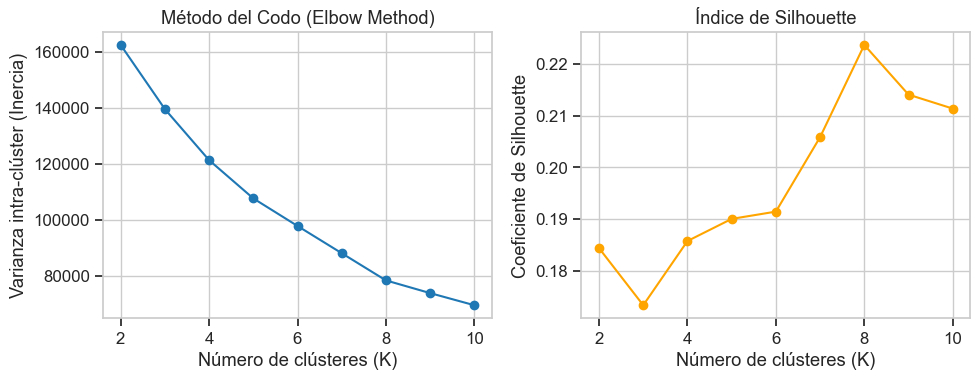

In [101]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Usa la misma variable que en el primer bloque
X = X_cluster  

varianza_intra_cluster = []
silhouettes = []
labels_dict = {}  # Para guardar las etiquetas de cada K

# Evaluamos entre 2 y 10 clusters (evitamos K=1 para silhouette)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
    varianza_intra_cluster.append(kmeans.inertia_)
    
    # Cálculo del coeficiente de Silhouette
    silhouette = silhouette_score(X, kmeans.labels_)
    silhouettes.append(silhouette)
    
    # Guardamos las etiquetas para cada K (opcional)
    labels_dict[k] = kmeans.labels_

# --- Gráfico de la varianza intra-clúster (Elbow) ---
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), varianza_intra_cluster, marker='o')
plt.title('Método del Codo (Elbow Method)')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra-clúster (Inercia)')

# --- Gráfico del índice de Silhouette ---
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouettes, marker='o', color='orange')
plt.title('Índice de Silhouette')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Coeficiente de Silhouette')

plt.tight_layout()
plt.show()



In [102]:
# ===============================================
# Análisis de segmentación por K-Means
# ===============================================

from sklearn.cluster import KMeans
import pandas as pd

# Entrenamiento del modelo de clustering
kmeans = KMeans(
    n_clusters=8,        # Número óptimo de clústeres determinado por los métodos del codo y silhouette
    init='k-means++',    # Inicialización más estable y eficiente
    max_iter=300,        # Número máximo de iteraciones para convergencia
    random_state=42,     # Reproducibilidad
    n_init=10            # Número de inicializaciones distintas para mayor estabilidad
)

# Asignar cada observación a un clúster
df['Cluster'] = kmeans.fit_predict(X_cluster)


In [103]:
# ===============================================
# Resumen estadístico por clúster
# ===============================================
cluster_summary = (
    df.groupby('Cluster')[['Price_USD', 'Engine_Size_L', 'Sales_Volume']]
    .mean()
    .round(2)
    .sort_index()
)

# Renombrar columnas para mayor claridad
cluster_summary = cluster_summary.rename(columns={
    'Price_USD': 'Precio promedio (USD)',
    'Engine_Size_L': 'Tamaño medio del motor (L)',
    'Sales_Volume': 'Volumen promedio de ventas'
})

# Agregar conteo de registros por clúster
cluster_summary['Número de registros'] = df['Cluster'].value_counts().sort_index().values

# Mostrar el resumen
print("Resumen estadístico por clúster:")
print(cluster_summary)

Resumen estadístico por clúster:
         Precio promedio (USD)  Tamaño medio del motor (L)  \
Cluster                                                      
0                     54086.81                        4.02   
1                     95493.33                        4.03   
2                     96248.48                        2.49   
3                     94348.70                        4.03   
4                     54576.71                        2.46   
5                     54788.95                        2.46   
6                     55435.66                        4.05   
7                     94683.51                        2.45   

         Volumen promedio de ventas  Número de registros  
Cluster                                                   
0                           7235.55                 6271  
1                           7315.82                 6392  
2                           2893.34                 6199  
3                           2796.11                

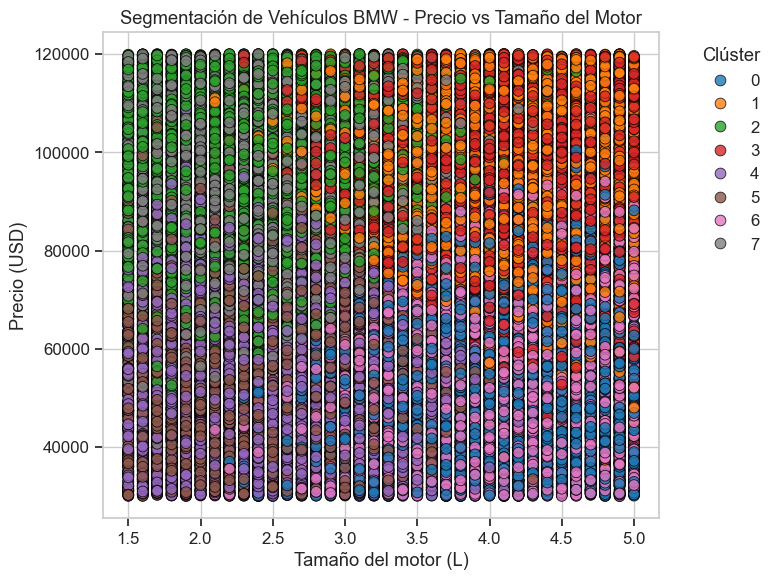

In [104]:
import seaborn as sns
# Configuración estética general
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.1)

# ===============================================
# 1. Gráfico de dispersión 2D: Precio vs Tamaño del motor
# ===============================================
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Engine_Size_L',
    y='Price_USD',
    hue='Cluster',
    palette='tab10',
    alpha=0.8,
    s=60,
    edgecolor='black'
)
plt.title('Segmentación de Vehículos BMW - Precio vs Tamaño del Motor')
plt.xlabel('Tamaño del motor (L)')
plt.ylabel('Precio (USD)')
plt.legend(title='Clúster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


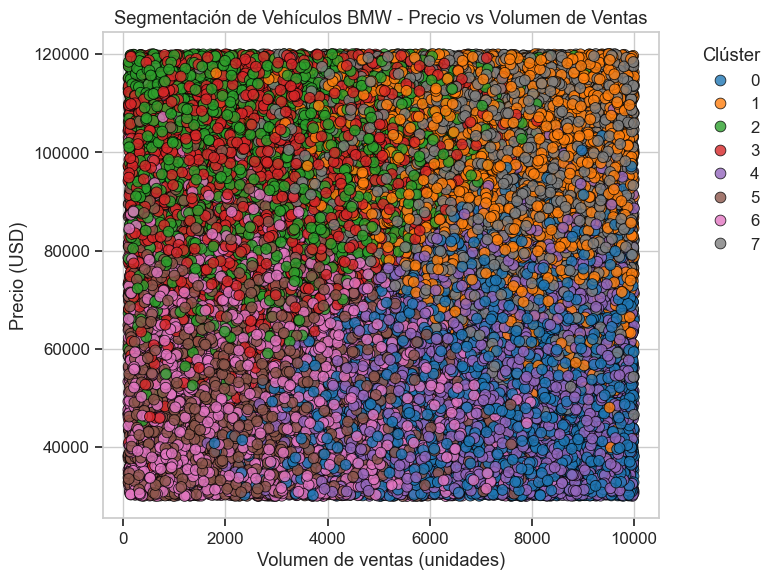

In [105]:
# ===============================================
# 2. Gráfico de dispersión 2D: Precio vs Volumen de ventas
# ===============================================
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Sales_Volume',
    y='Price_USD',
    hue='Cluster',
    palette='tab10',
    alpha=0.8,
    s=60,
    edgecolor='black'
)
plt.title('Segmentación de Vehículos BMW - Precio vs Volumen de Ventas')
plt.xlabel('Volumen de ventas (unidades)')
plt.ylabel('Precio (USD)')
plt.legend(title='Clúster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

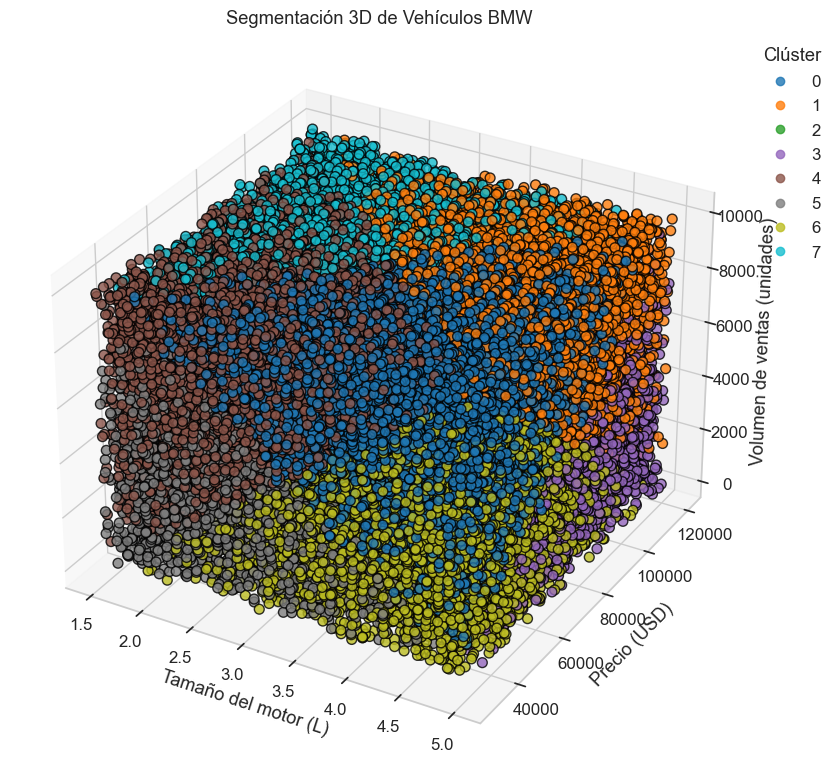

In [106]:
# ===============================================
# 3. Gráfico de dispersión 3D: Precio, Tamaño del motor y Ventas
# ===============================================
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar cada punto en el espacio tridimensional
scatter = ax.scatter(
    df['Engine_Size_L'],
    df['Price_USD'],
    df['Sales_Volume'],
    c=df['Cluster'],
    cmap='tab10',
    s=50,
    alpha=0.8,
    edgecolor='black'
)

ax.set_title('Segmentación 3D de Vehículos BMW')
ax.set_xlabel('Tamaño del motor (L)')
ax.set_ylabel('Precio (USD)')
ax.set_zlabel('Volumen de ventas (unidades)')

# Leyenda de clústeres
legend = ax.legend(
    *scatter.legend_elements(),
    title='Clúster',
    loc='upper left',
    bbox_to_anchor=(1, 1)
)

plt.tight_layout()
plt.show()

1. Gráfico 2D (Precio vs Tamaño del motor)
Muestra la relación entre el tamaño del motor y el precio de venta promedio.
- Los clústeres de gama alta (motores grandes, precios elevados) se ubicarán hacia la parte superior derecha.
- Los clústeres de vehículos compactos o de entrada se concentrarán hacia la parte inferior izquierda.

2. Gráfico 2D (Precio vs Volumen de ventas)
- Permite observar la relación entre el nivel de precios y la cantidad de unidades vendidas.
- Generalmente, los clústeres con precios bajos presentan mayores volúmenes.
- Los de precios altos suelen tener menor volumen pero mayor margen de rentabilidad.

3. Gráfico 3D (Precio, Tamaño del motor y Volumen de ventas)
- Este gráfico integra las tres dimensiones principales y permite visualizar la estructura de los clústeres de manera más completa.

- Facilita observar si existen agrupamientos bien definidos o solapamientos entre segmentos.

- Es útil para detectar patrones complejos (por ejemplo, vehículos con motores medianos pero precios elevados por tecnología híbrida).

## Visualizacion temporal 

In [107]:
# ===============================================
# Preparación de datos para análisis temporal por clúster
# ===============================================

# Agrupar por año y clúster, calculando indicadores promedio
cluster_time = (
    df.groupby(['Year', 'Cluster'])
      .agg({
          'Price_USD': 'mean',
          'Sales_Volume': 'sum'
      })
      .reset_index()
      .sort_values(['Cluster', 'Year'])
)

# Renombrar columnas para mayor claridad
cluster_time = cluster_time.rename(columns={
    'Price_USD': 'Precio_promedio_USD',
    'Sales_Volume': 'Ventas_totales'
})

cluster_time.head()


,Year,Cluster,Precio_promedio_USD,Ventas_totales
0,2010,0,53966.819672,3088617
8,2011,0,54045.657702,2941292
16,2012,0,54734.518337,2952959
24,2013,0,53141.900726,2926828
32,2014,0,52715.681928,2957327


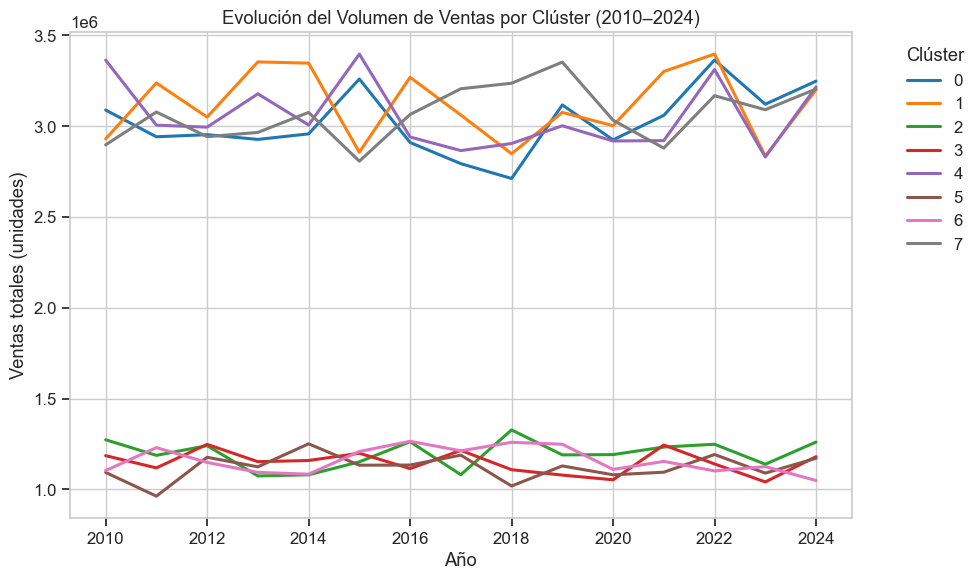

In [108]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=cluster_time,
    x='Year',
    y='Ventas_totales',
    hue='Cluster',
    palette='tab10',
    linewidth=2.2
)

plt.title('Evolución del Volumen de Ventas por Clúster (2010–2024)')
plt.xlabel('Año')
plt.ylabel('Ventas totales (unidades)')
plt.legend(title='Clúster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


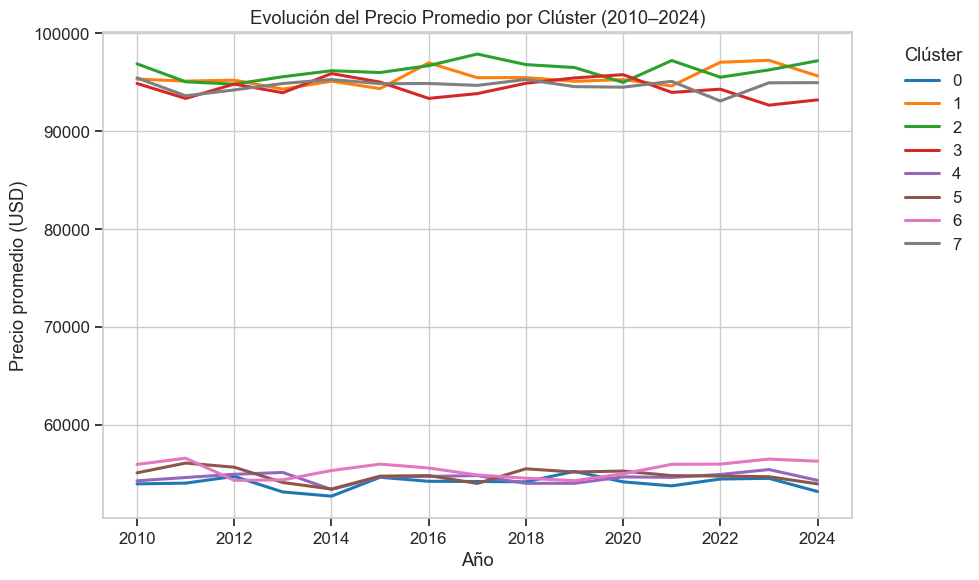

In [109]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=cluster_time,
    x='Year',
    y='Precio_promedio_USD',
    hue='Cluster',
    palette='tab10',
    linewidth=2.2
)

plt.title('Evolución del Precio Promedio por Clúster (2010–2024)')
plt.xlabel('Año')
plt.ylabel('Precio promedio (USD)')
plt.legend(title='Clúster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [110]:
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,age_model,is_luxury,Segmento,Cluster
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,8,1,Ejecutivo,7
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,11,0,Deportivo,5
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,2,1,Ejecutivo,1
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,0,0,Camioneta / SUV,4
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,4,0,Ejecutivo,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High,10,0,Eléctrico / Híbrido,0
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High,1,0,Eléctrico / Híbrido,0
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High,14,0,Ejecutivo,0
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High,4,0,Eléctrico / Híbrido,4


## Modelo predictivo final para predecir el volumen de ventas

In [151]:
Y = df['Sales_Volume']  # variable objetivo
x = df.drop(['Sales_Volume', 'Model'], axis=1)  # variables predictoras

In [152]:
x= pd.get_dummies(
    x, 
    columns=['Region', 'Color', 'Fuel_Type', 'Transmission', 'Segmento','Sales_Classification','Cluster'],
    drop_first=True
)
x

,Year,Engine_Size_L,Mileage_KM,Price_USD,age_model,is_luxury,Region_Asia,Region_Europe,Region_Middle East,Region_North America,...,Segmento_Eléctrico / Híbrido,Segmento_Sedán,Sales_Classification_Low,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7
0,2016,3.5,151748,98740,8,1,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2013,1.6,121671,79219,11,0,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
2,2022,4.5,10991,113265,2,1,False,False,False,True,...,False,False,True,True,False,False,False,False,False,False
3,2024,1.7,27255,60971,0,0,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False
4,2020,2.1,122131,49898,4,0,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2014,4.6,151030,42932,10,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
49996,2023,4.2,147396,48714,1,0,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
49997,2010,4.5,174939,46126,14,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
49998,2020,3.8,3379,58566,4,0,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [153]:
x = x.copy()
x[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'age_model']] = scaler.fit_transform(
    x[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD','age_model']]
)
x

,Year,Engine_Size_L,Mileage_KM,Price_USD,age_model,is_luxury,Region_Asia,Region_Europe,Region_Middle East,Region_North America,...,Segmento_Eléctrico / Híbrido,Segmento_Sedán,Sales_Classification_Low,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7
0,-0.234876,0.250548,0.887814,0.911817,0.234876,1,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,-0.928611,-1.632377,0.368717,0.160951,0.928611,0,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
2,1.152595,1.241561,-1.541504,1.470514,-1.152595,1,False,False,False,True,...,False,False,True,True,False,False,False,False,False,False
3,1.615085,-1.533276,-1.260805,-0.540950,-1.615085,0,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False
4,0.690105,-1.136871,0.376656,-0.966867,-0.690105,0,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.697366,1.340662,0.875423,-1.234811,0.697366,0,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
49996,1.383840,0.944257,0.812704,-1.012409,-1.383840,0,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
49997,-1.622346,1.241561,1.288067,-1.111955,1.622346,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
49998,0.690105,0.547852,-1.672880,-0.633457,-0.690105,0,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [154]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42, stratify=y)

### Xgbost

In [155]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(x_train, Y_train)
y_pred = xgb_model.predict(x_test)
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el error cuadrático medio
mse = mean_squared_error(Y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.4f}')

# Calcular el R2 score
r2 = r2_score(Y_test, y_pred)
print(f'R2 Score: {r2:.4f}')


Mean Squared Error (MSE): 1662524.0166
R2 Score: 0.7980


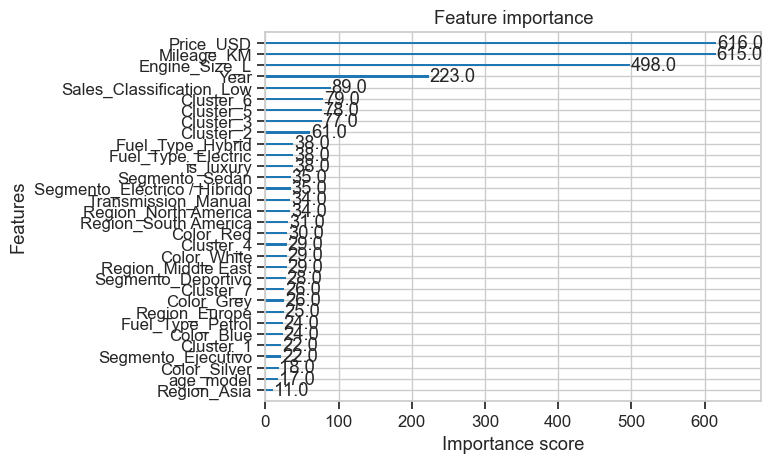

In [156]:
xgb.plot_importance(xgb_model)
plt.show()

In [150]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(xgb_model, x_train, Y_train, cv=5, scoring='neg_mean_squared_error')

# Convertir los scores de MSE negativos a valores positivos
cv_scores = -cv_scores

# Mostrar los resultados de la validación cruzada
print(f"Validación cruzada MSE para cada pliegue: {cv_scores}")
print(f"Promedio de MSE en la validación cruzada: {cv_scores.mean():.4f}")

Validación cruzada MSE para cada pliegue: [1702294.68693033 1669144.51832654 1662389.61881073 1639619.59997921
 1715710.99313121]
Promedio de MSE en la validación cruzada: 1677831.8834


### Radom forest 

In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear el modelo RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(x_train, Y_train)

# Hacer predicciones
y_pred_rf = rf_model.predict(x_test)

# Calcular MSE y R2
mse_rf = mean_squared_error(Y_test, y_pred_rf)
r2_rf = r2_score(Y_test, y_pred_rf)

print(f'Mean Squared Error (MSE) para Random Forest: {mse_rf:.4f}')
print(f'R2 Score para Random Forest: {r2_rf:.4f}')


Mean Squared Error (MSE) para Random Forest: 1718242.3554
R2 Score para Random Forest: 0.7912


### GradientBoosting

In [160]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear el modelo GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Entrenar el modelo
gb_model.fit(x_train, Y_train)

# Hacer predicciones
y_pred_gb = gb_model.predict(x_test)

# Calcular MSE y R2
mse_gb = mean_squared_error(Y_test, y_pred_gb)
r2_gb = r2_score(Y_test, y_pred_gb)

print(f'Mean Squared Error (MSE) para Gradient Boosting: {mse_gb:.4f}')
print(f'R2 Score para Gradient Boosting: {r2_gb:.4f}')


Mean Squared Error (MSE) para Gradient Boosting: 1678285.9361
R2 Score para Gradient Boosting: 0.7961


### Red neuronal

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Verificar que TensorFlow detecte la GPU
print("GPUs disponibles:", tf.config.list_physical_devices('GPU'))

# Crear un conjunto de datos de ejemplo (regresión)
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Red Neuronal (MLP)
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Capa de salida para regresión

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo en la GPU
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse_nn = mean_squared_error(y_test, y_pred)
r2_nn = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE) para Neural Network: {mse_nn:.4f}')
print(f'R2 Score para Neural Network: {r2_nn:.4f}')



Mean Squared Error (MSE) para MLP: 1656347.0944
R2 Score para MLP: 0.7987
